# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Important Note:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an overview of Dandiset 000690, the Allen Institute Openscope - Vision2Hippocampus project.
We will explore the data and metadata available in this Dandiset, including LFP data and electrode metadata.

Link to the Dandiset: https://dandiarchive.org/dandiset/000690

This notebook will cover the following:

*   Loading the Dandiset using the DANDI API
*   Exploring the assets in the Dandiset
*   Loading and visualizing LFP data from an NWB file
*   Examining the electrode metadata

Required packages:

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   pandas
*   seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


Load one of the NWB files and show some metadata.
We will load the file `sub-692072/sub-692072_ses-1298465622_probe-1_ecephys.nwb`.

Here is the link to the NWB file on neurosift:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/79686db3-e4ef-4214-89f6-f2589ddb4ffe/download/&dandisetId=000690&dandisetVersion=draft

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/79686db3-e4ef-4214-89f6-f2589ddb4ffe/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb.session_description # (str) LFP data and associated info for one probe
nwb.identifier # (str) 1
nwb.session_start_time # (datetime) 2023-09-21T00:00:00-07:00
nwb.file_create_date # (list) [datetime.datetime(2025, 2, 25, 16, 39, 27, 898747, tzinfo=tzoffset(None, -28800))]
nwb.subject # (EcephysSpecimen)
nwb.subject.age # (str) P82D
nwb.subject.genotype # (str) wt/wt
nwb.subject.sex # (str) M
nwb.subject.species # (str) Mus musculus

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


'Mus musculus'

Load and visualize LFP data from the NWB file.

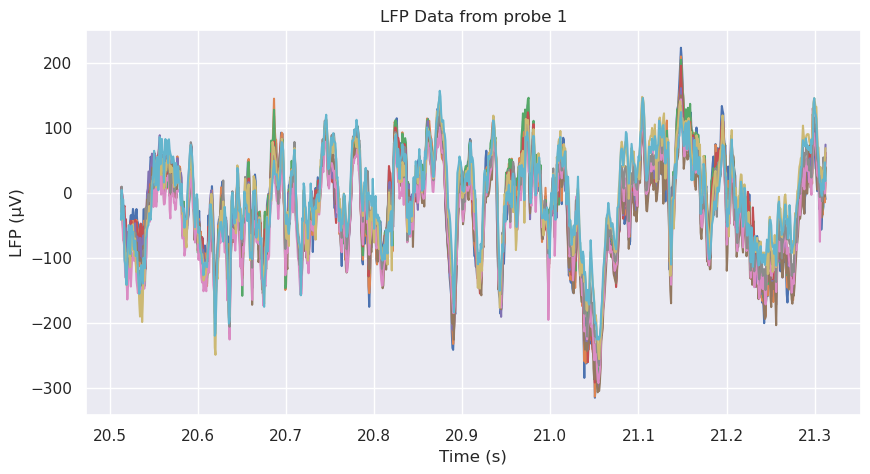

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Get LFP data
acquisition = nwb.acquisition
probe_1_lfp = acquisition["probe_1_lfp"]
electrical_series = probe_1_lfp.electrical_series
probe_1_lfp_data = electrical_series["probe_1_lfp_data"]

# Load a small subset of the data and timestamps
num_samples = 1000
data = probe_1_lfp_data.data[:num_samples, :10]
timestamps = probe_1_lfp_data.timestamps[:num_samples]

# Convert LFP data to microvolts
data_uv = data * 1e6

# Plot the LFP data
plt.figure(figsize=(10, 5))
plt.plot(timestamps, data_uv)
plt.xlabel("Time (s)")
plt.ylabel("LFP (μV)")
plt.title("LFP Data from probe 1")
plt.show()

Examine the electrode metadata.

In [4]:
import pandas as pd
from IPython.display import display

# Get electrode metadata
electrodes = nwb.electrodes
electrodes_df = electrodes.to_dataframe()

# Print some of the electrode metadata
display(electrodes_df.head())
display(electrodes_df.describe())

# The 'imp' column contains NaN values

,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
1002,SUB,probeB abc.EcephysElectrodeGroup at 0x13966489...,probeB,40,59,1,2,True,9393.0,3901.0,9310.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1006,SUB,probeB abc.EcephysElectrodeGroup at 0x13966489...,probeB,80,59,1,6,True,9400.0,3871.0,9309.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1010,SUB,probeB abc.EcephysElectrodeGroup at 0x13966489...,probeB,120,59,1,10,True,9406.0,3840.0,9308.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1014,SUB,probeB abc.EcephysElectrodeGroup at 0x13966489...,probeB,160,59,1,14,True,9415.0,3802.0,9307.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1018,SUB,probeB abc.EcephysElectrodeGroup at 0x13966489...,probeB,200,59,1,18,True,9421.0,3770.0,9306.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


,probe_vertical_position,probe_horizontal_position,probe_id,local_index,x,y,z,imp
count,73.000000,73.0,73.0,73.000000,73.000000,73.000000,73.000000,0.0
mean,1480.000000,59.0,1.0,146.000000,9620.958904,2467.890411,9138.575342,NaN
std,848.685258,0.0,0.0,84.868526,126.697632,909.050291,191.097846,NaN
min,40.000000,59.0,1.0,2.000000,9393.000000,842.000000,8724.000000,NaN
25%,760.000000,59.0,1.0,74.000000,9516.000000,1713.000000,8996.000000,NaN
50%,1480.000000,59.0,1.0,146.000000,9627.000000,2527.000000,9242.000000,NaN
75%,2200.000000,59.0,1.0,218.000000,9729.000000,3252.000000,9292.000000,NaN
max,2920.000000,59.0,1.0,290.000000,9827.000000,3901.000000,9310.000000,NaN


Summary:

This notebook provided an overview of Dandiset 000690, the Allen Institute Openscope - Vision2Hippocampus project.
We explored the data and metadata available in this Dandiset, including LFP data and electrode metadata.

Possible future directions:

*   Explore other NWB files in the Dandiset.
*   Analyze the LFP data in more detail.
*   Investigate the relationship between the LFP data and the electrode metadata.